In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [99]:
# Read the dataset
df = pd.read_csv('BC-Data-Set.csv', sep=';')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                                date           BC        N_CPC        PM-10  \
count                           4223  4223.000000  4223.000000  4223.000000   
mean   2019-06-08 17:44:58.934406912     1.309454    13.651880    15.132366   
min              2019-01-01 00:00:00     0.110000     1.376000     0.600000   
25%              2019-02-24 23:30:00     0.658500     7.725500     8.550000   
50%              2019-06-02 11:00:00     0.971000    11.547000    12.883000   
75%              2019-09-22 03:30:00     1.513000    17.505500    18.467000   
max              2019-12-10 23:00:00    12.767000    73.490000   398.717000   
std                              NaN     1.122286     8.236568    14.254218   

            PM-2.5       PM-1.0          NO2           O3          SO2  \
count  4223.000000  4223.000000  4223.000000  4223.000000  4223.000000   
mean      9.302461     7.259924    30.032402    48.139158     1.368459   
min       0.500000     0.333000     2.000000  

Kind of a spoiler, but we can already see the correlation between BC and the rest of factors.

In [100]:
# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix["BC"])


Correlation Matrix:
date     -0.023827
BC        1.000000
N_CPC     0.514739
PM-10     0.331862
PM-2.5    0.504558
PM-1.0    0.496120
NO2       0.493987
O3       -0.352667
SO2       0.057469
CO        0.260429
NO        0.365809
NOX       0.466400
TEMP     -0.016964
HUM       0.129768
Name: BC, dtype: float64


In [101]:
colors = {
    'date': 'grey',
    'BC': 'black',
    'N_CPC': 'purple',
    'PM-10': 'green',
    'PM-2.5': 'crimson',
    'PM-1.0': 'brown',
    'NO2': 'deeppink',
    'O3': 'blue',
    'SO2': 'navy',
    'CO': 'goldenrod',
    'NO': 'orange',
    'NOX': 'lime',
    'TEMP': 'red',
    'HUM': 'cyan'
}
df['date']

0      2019-01-01 00:00:00
1      2019-01-01 01:00:00
2      2019-01-01 02:00:00
3      2019-01-01 03:00:00
4      2019-01-01 04:00:00
               ...        
4218   2019-12-10 19:00:00
4219   2019-12-10 20:00:00
4220   2019-12-10 21:00:00
4221   2019-12-10 22:00:00
4222   2019-12-10 23:00:00
Name: date, Length: 4223, dtype: datetime64[ns]

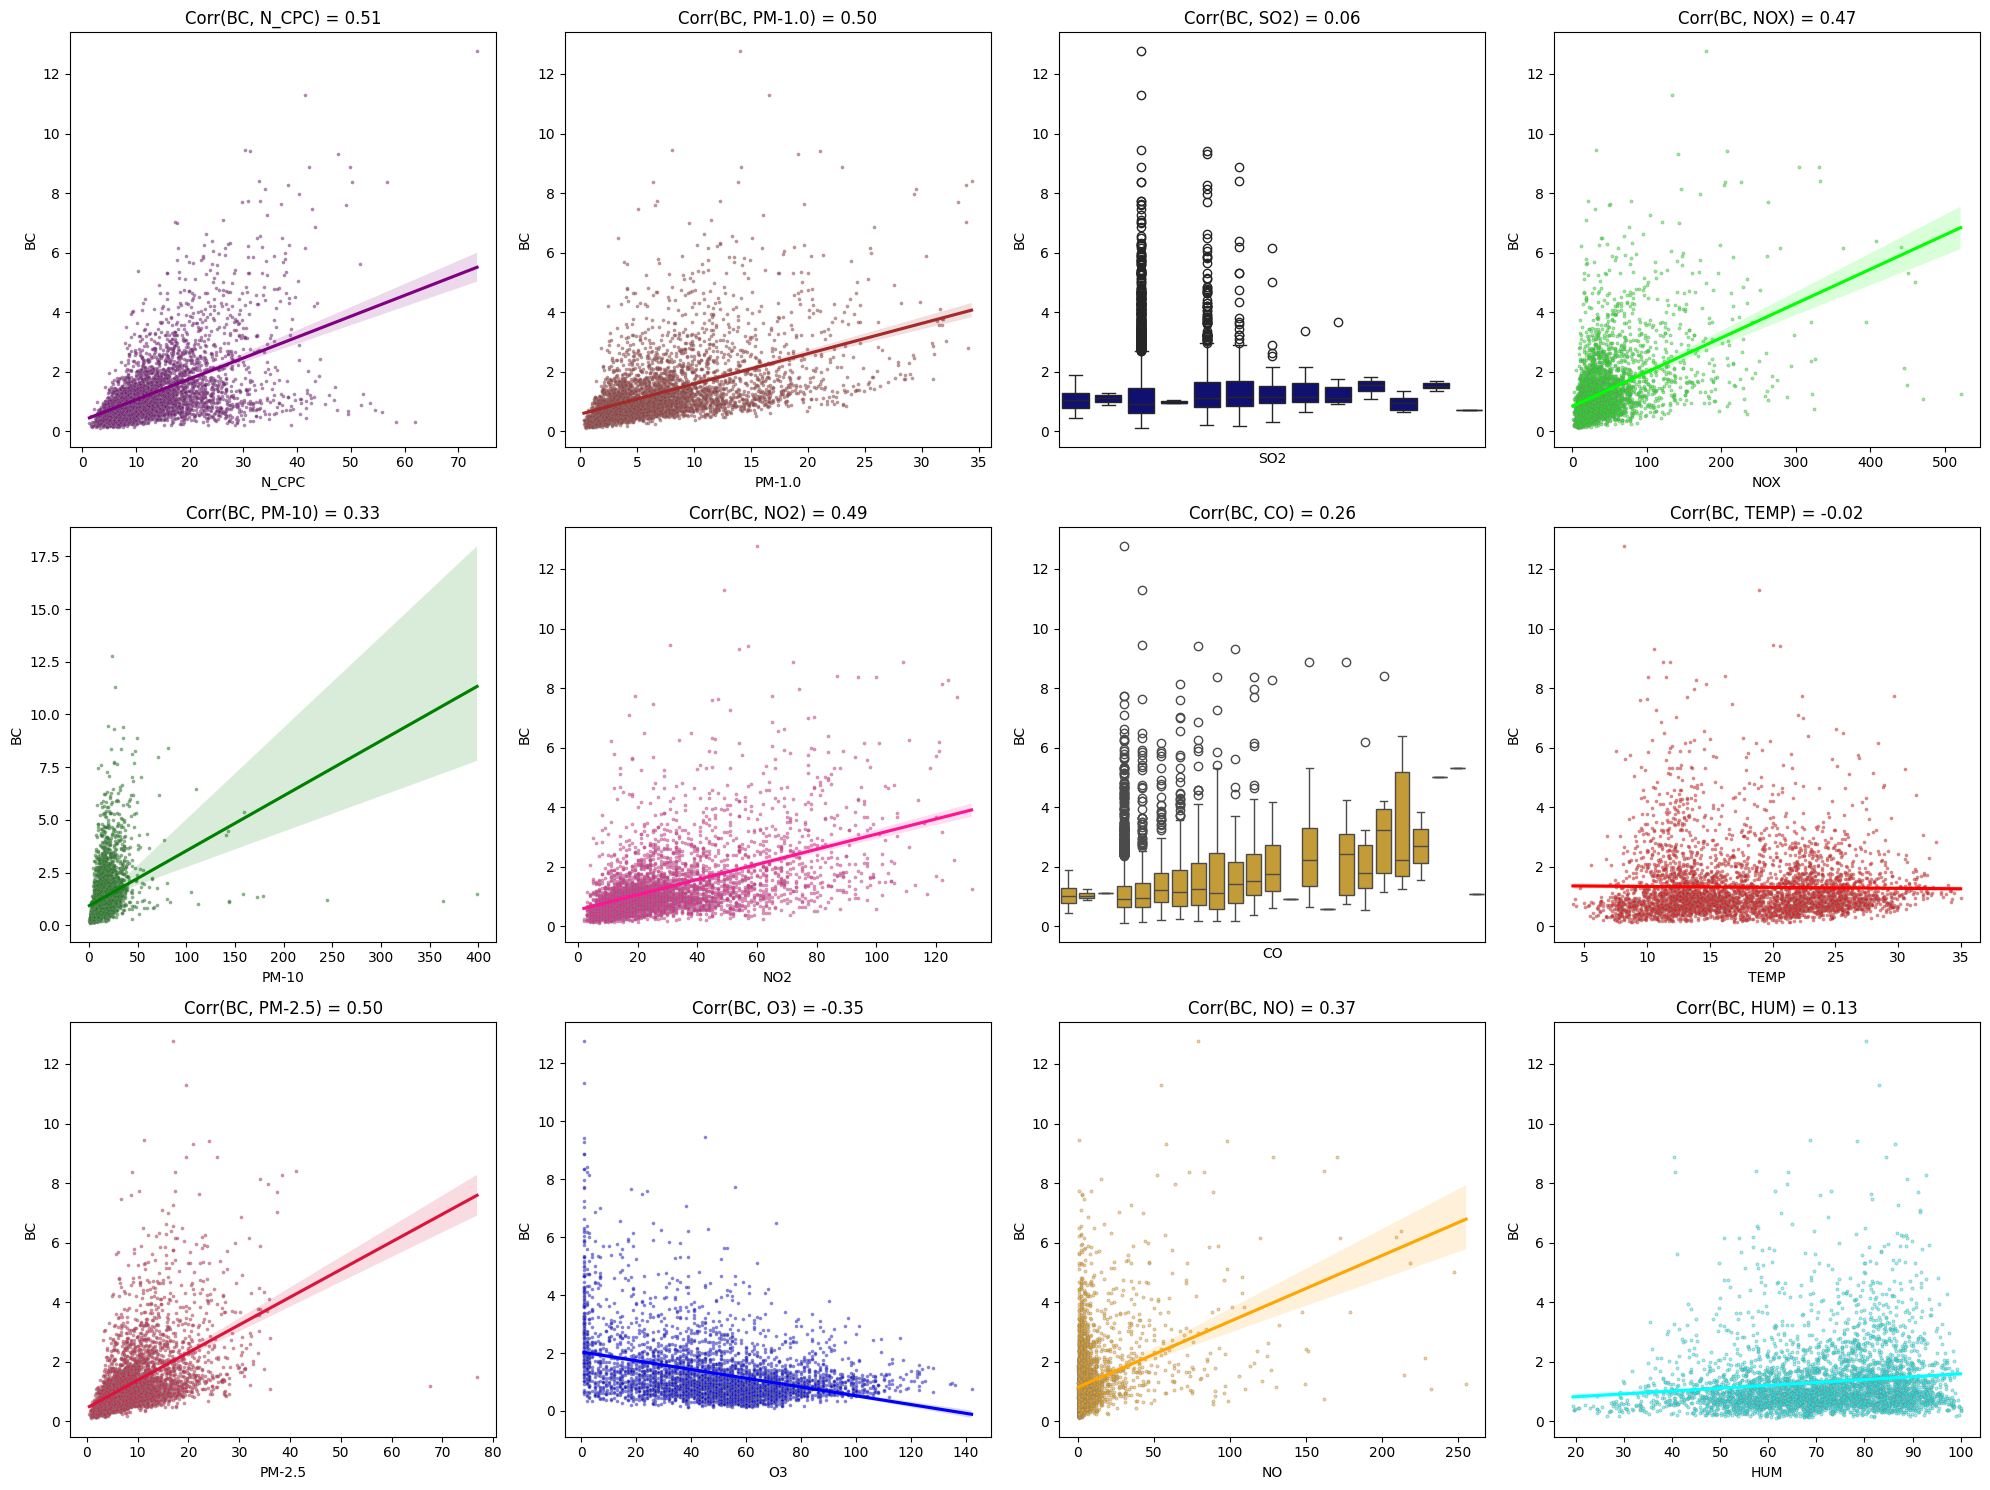

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all columns except 'BC' and 'date'
columns_of_interest = [col for col in df.columns if (col != 'BC' and col != 'date')]

# Create a 4x3 grid of axes for subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# Loop over the columns and create a scatter plot with regression line for each one
for i, column in enumerate(columns_of_interest):
    row = i % 3
    col = i // 3
    if column in ['CO', 'SO2']:
        sns.boxplot(x=column, y='BC', ax=axs[row, col], data=df, color=colors[column])
        axs[row, col].set(xticks=[])  # Remove x-ticks
        axs[row, col].set_title(f'Corr(BC, {column}) = {correlation_matrix["BC"][column]:.2f}')
    else:
        sns.regplot(x=df[column], y=df['BC'], ax=axs[row, col], color=colors[column], 
                    scatter_kws={'s': 5, 'alpha': 0.5, 'edgecolor': 'grey', 'linewidths': 0.5})
        axs[row, col].set_title(f'Corr(BC, {column}) = {correlation_matrix["BC"][column]:.2f}')

# Remove any unused subplots
for j in range(i+1, 12):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

## Normalize the data before the temporal trend comparision

In [103]:
# Create a copy of the 'date' column
date_column = df['date'].copy()

# normalize all columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# This will remove the date column from the dataframe
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

## Get the monthly averages and plot the trends

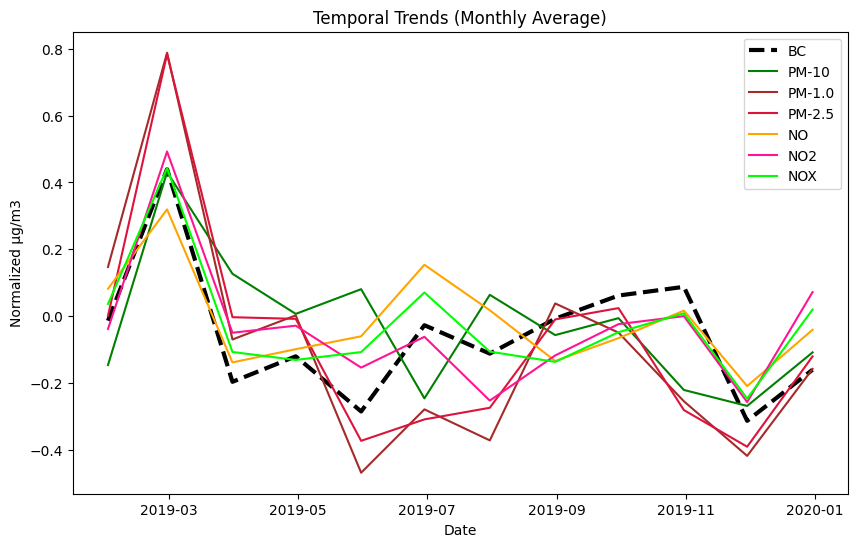

In [104]:
# Create a copy of the original DataFrame
df_copy = df.copy()

# Convert 'date' column to datetime format if it's not already
if df_copy['date'].dtype != 'datetime64[ns]':
    df_copy['date'] = pd.to_datetime(df_copy['date'])

# Set 'date' as the index
df_copy.set_index('date', inplace=True)

# Resample to a monthly frequency and calculate the mean
df_monthly = df_copy.resample('ME').mean()

# Plot the monthly averages
plt.figure(figsize=(10, 6))

plt.plot(df_monthly.index, df_monthly['BC'], label='BC', linestyle='--', color='black', linewidth=3)
columns_to_plot = ['PM-10', 'PM-1.0', 'PM-2.5', 'NO', 'NO2', 'NOX']
for column in columns_to_plot:
    plt.plot(df_monthly.index, df_monthly[column], label=column, color=colors[column])

plt.xlabel('Date')
plt.ylabel('Normalized μg/m3')
plt.title('Temporal Trends (Monthly Average)')
plt.legend()
plt.show()

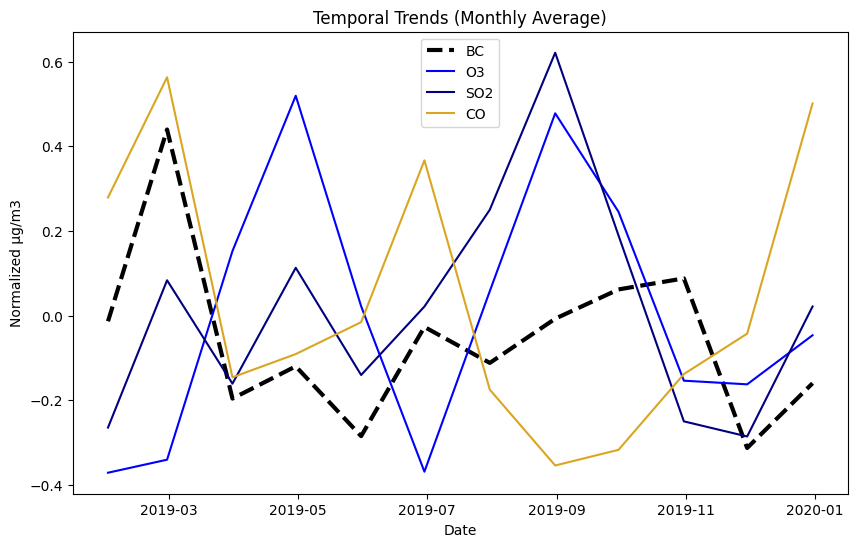

In [105]:

# Plot the monthly averages
plt.figure(figsize=(10, 6))

plt.plot(df_monthly.index, df_monthly['BC'], label='BC', linestyle='--', color='black', linewidth=3)
columns_to_plot = ['O3', 'SO2', 'CO']
for column in columns_to_plot:
    plt.plot(df_monthly.index, df_monthly[column], label=column, color=colors[column])

plt.xlabel('Date')
plt.ylabel('Normalized μg/m3')
plt.title('Temporal Trends (Monthly Average)')
plt.legend()
plt.show()

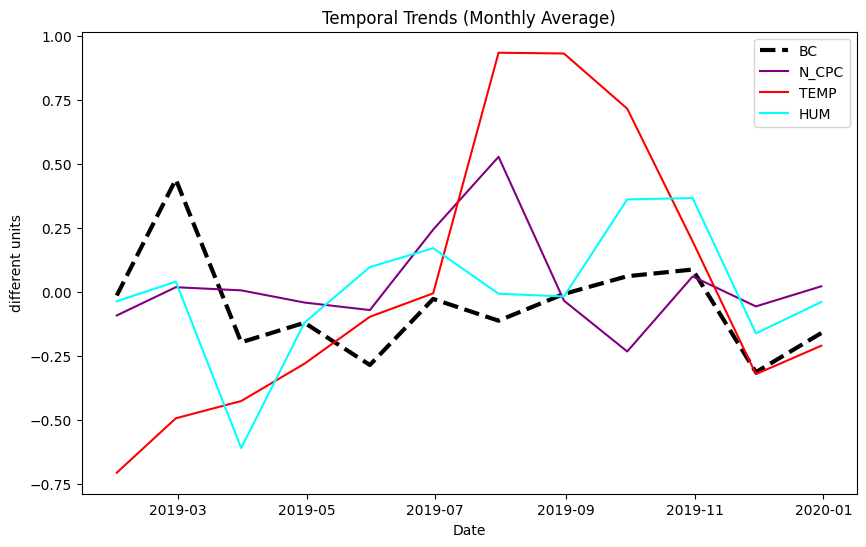

In [106]:
# Plot the monthly averages
plt.figure(figsize=(10, 6))

plt.plot(df_monthly.index, df_monthly['BC'], label='BC', linestyle='--', color='black', linewidth=3)
columns_to_plot = ['N_CPC','TEMP', 'HUM']
for column in columns_to_plot:
    plt.plot(df_monthly.index, df_monthly[column], color = colors[column], label=column)

plt.xlabel('Date')
plt.ylabel('different units')
plt.title('Temporal Trends (Monthly Average)')
plt.legend()
plt.show()

Shuffle the data into train and test sets

In [107]:
from sklearn.model_selection import train_test_split

features = ['N_CPC', 'PM-10', 'PM-1.0', 'NO2', 'O3', 'SO2', 'CO', 'NO', 'NO2', 'NOX', 'TEMP', 'HUM']
target = 'BC'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=52)
train_dates = date_column[X_train.index]
test_dates = date_column[X_test.index]

A linear regression model is bound to not be very good, but we still do it for illustration porpouses.

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Create a linear regression model
LinReg = LinearRegression()

# Train the model
LinReg.fit(X_train, y_train)

# Make predictions on the testing set
pred_linreg = LinReg.predict(X_test)

# Calculate R^2
r2_linreg = r2_score(y_test, pred_linreg)
print(f'R^2: {r2_linreg}')

# Calculate RMSE
rmse_linreg = sqrt(mean_squared_error(y_test, pred_linreg))
print(f'RMSE: {rmse_linreg}')

R^2: 0.5424684536944936
RMSE: 0.6864501547334452


## Support Vector Regression model

In [109]:
from sklearn.svm import SVR
# SVR with 'rbf' kernel works best
Svr = SVR(kernel='rbf')

# Train the model
Svr.fit(X_train, y_train)

# Generate predictions for the test set
pred_svr = Svr.predict(X_test)

# Calculate R^2
r2_svr = r2_score(y_test, pred_svr)
print(f'R^2: {r2_svr}')

# Calculate RMSE
rmse_svr = sqrt(mean_squared_error(y_test, pred_svr))
print(f'RMSE: {rmse_svr}')


R^2: 0.6448681787447634
RMSE: 0.6047742335883145


## Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

Rf = RandomForestRegressor()

# Train the model
Rf.fit(X_train, y_train)

# Generate predictions for the test set
pred_rf = Rf.predict(X_test)

# Calculate R^2
r2_rf = r2_score(y_test, pred_rf)
print(f'R^2: {r2_rf}')

# Calculate RMSE
rmse_rf = sqrt(mean_squared_error(y_test, pred_rf))
print(f'RMSE: {rmse_rf}')

R^2: 0.7156807867722811
RMSE: 0.5411299727367652


## Feed-Forward Neural Network

In [111]:
import torch
from torch import nn

# Define the model
Fnn = nn.Sequential(
    nn.Linear(X_train.shape[1], 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(Fnn.parameters(), lr=0.01)
X_train_torch = torch.tensor(X_train.values, dtype=torch.float)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float)
X_test_torch = torch.tensor(X_test.values, dtype=torch.float)

# Train the model
for epoch in range(50):
    Fnn.train()
    optimizer.zero_grad()
    
    y_pred = Fnn(X_train_torch)
    loss = criterion(y_pred, y_train_torch.view(-1, 1))
    
    loss.backward()
    optimizer.step()

# Generate predictions for the test set
Fnn.eval()
with torch.no_grad():
    pred_nn = Fnn(X_test_torch).numpy().flatten()

# Calculate R^2
r2_nn = r2_score(y_test, pred_nn)
print(f'R^2: {r2_nn}')

# Calculate RMSE
rmse_nn = sqrt(mean_squared_error(y_test, pred_nn))
print(f'RMSE: {rmse_nn}')

R^2: 0.6822420728983669
RMSE: 0.5720667185679194


In [ ]:
from IPython.display import display, Markdown

# Create a string with the Markdown syntax and the values of your variables
markdown_text = f"""
| Model            | R^2 Score | RMSE Score |
|------------------|-----------|------------|
| Linear Regression| {r2_linreg} | {rmse_linreg} |
| SVR              | {r2_svr}   | {rmse_svr}   |
| Random Forest    | {r2_rf}   | {rmse_rf}   |
| Neural Network   | {r2_nn}   | {rmse_nn}   |
"""

# Display the string as Markdown
display(Markdown(markdown_text))


| Model            | R^2 Score | RMSE Score |
|------------------|-----------|------------|
| Linear Regression| 0.5424684536944936 | 0.6864501547334452 |
| SVR              | 0.6530194892806656   | 0.5977932769080972   |
| Random Forest    | 0.7199717295897596   | 0.5370310846891165   |
| Neural Network   | 0.6871952012167235   | 0.5675905929191146   |


## Plot monthly average Predictions

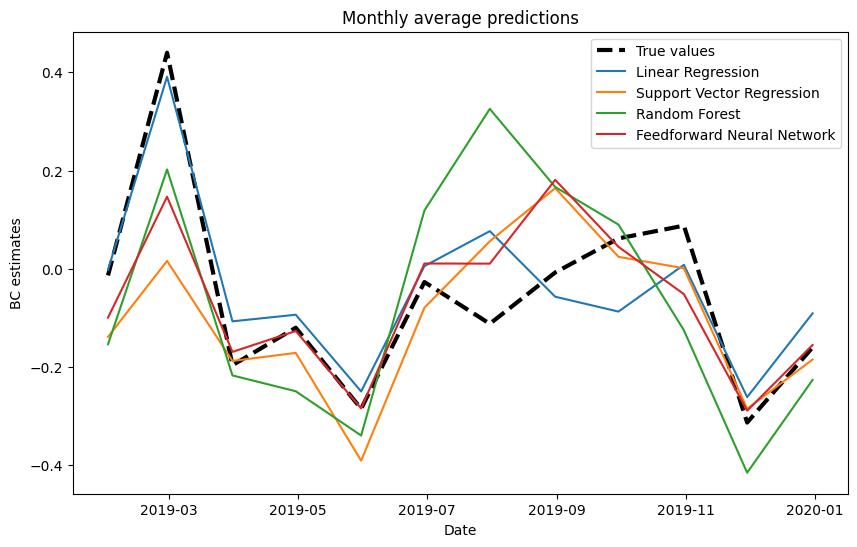

In [ ]:
plt.figure(figsize=(10, 6))
    
plt.plot(df_monthly.index, df_monthly['BC'], label='True values', color=colors['BC'], linestyle='--', linewidth=3)
plt.plot(df_monthly.index, LinReg.predict(df_monthly[features]), label='Linear Regression')
plt.plot(df_monthly.index, Svr.predict(df_monthly[features]), label='Support Vector Regression')
plt.plot(df_monthly.index, Rf.predict(df_monthly[features]), label='Random Forest')
plt.plot(df_monthly.index, Fnn(torch.tensor(df_monthly[features].values, dtype=torch.float)).detach().numpy(), label='Feedforward Neural Network')
plt.xlabel('Date')
plt.ylabel('BC estimates')
plt.title('Monthly average predictions')
plt.legend()
plt.show()

## Weekly averages

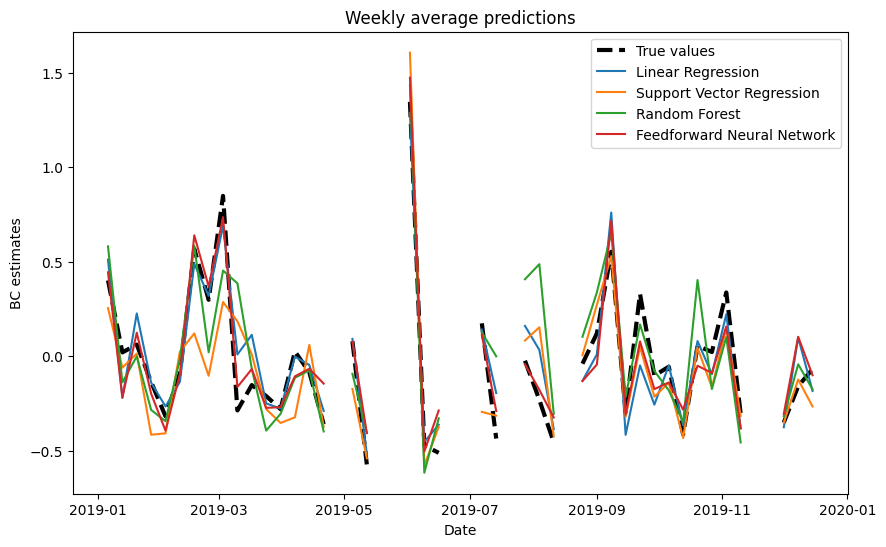

In [150]:
df_copy = df.copy()
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy.index = df_copy['date']
df_weekly = df_copy.resample('W').mean()
# Define a function to make predictions or return NaN
def predict_or_nan(row, model):
    if row.isna().any():
        return np.nan
    else:
        row_df = pd.DataFrame(row[features].values.reshape(1, -1), columns=features)
        # Convert row to DataFrame with feature names
        return model.predict(row_df)[0]
    
def predict_or_nan_fnn(row):
    if row.isna().any():
        return np.nan
    else:
        row_df = pd.DataFrame(row[features].values.reshape(1, -1), columns=features)
        # Convert the DataFrame to a numpy array of type float32
        row_values = row_df.values.astype(np.float32)
        # Make prediction and convert to numpy array
        prediction = Fnn(torch.tensor(row_values)).detach().numpy()
        return prediction[0][0]
    

# Apply the function to each row of df_weekly for each model
df_weekly['LinReg_predictions'] = df_weekly.apply(predict_or_nan, axis=1, model=LinReg)
df_weekly['Svr_predictions'] = df_weekly.apply(predict_or_nan, axis=1, model=Svr)
df_weekly['Rf_predictions'] = df_weekly.apply(predict_or_nan, axis=1, model=Rf)
df_weekly['Fnn_predictions'] = df_weekly.apply(predict_or_nan_fnn, axis=1)
# Plot the weekly averages along with the predictions
plt.figure(figsize=(10, 6))

plt.plot(df_weekly.index, df_weekly['BC'], label='True values', color='black', linestyle='--', linewidth=3)
plt.plot(df_weekly.index, df_weekly['LinReg_predictions'], label='Linear Regression')
plt.plot(df_weekly.index, df_weekly['Svr_predictions'], label='Support Vector Regression')
plt.plot(df_weekly.index, df_weekly['Rf_predictions'], label='Random Forest')
plt.plot(df_weekly.index, df_weekly['Fnn_predictions'], label='Feedforward Neural Network')
plt.xlabel('Date')
plt.ylabel('BC estimates')
plt.title('Weekly average predictions')
plt.legend()
plt.show()

## Methods hyperparameter discovery.
### FNN width?

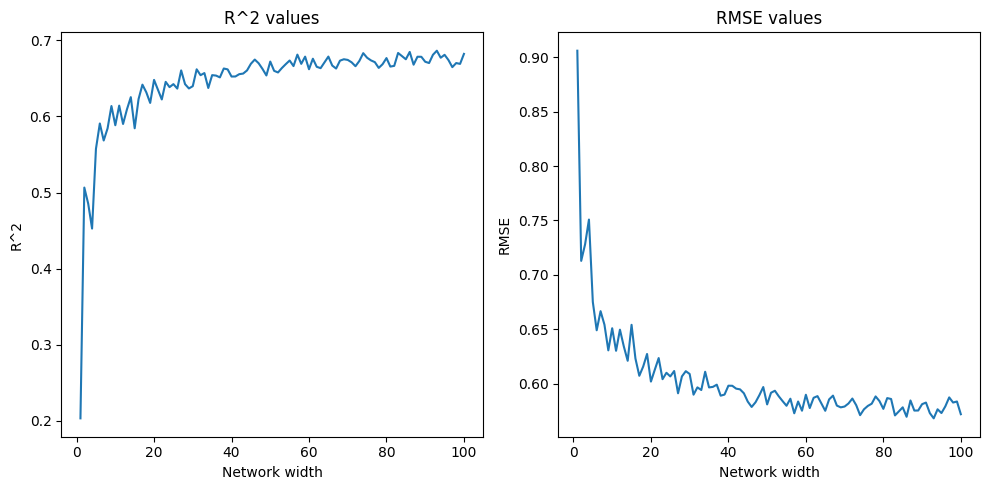

In [159]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import torch
from torch import nn

# Initialize lists to store R^2 and RMSE values
r2_values = []
rmse_values = []

# Iterate over different network widths
for width in range(1, 101):
    # Define the model with the current width
    Fnn = nn.Sequential(
        nn.Linear(X_train.shape[1], width),
        nn.ReLU(),
        nn.Linear(width, 1)
    )

    # Define the loss function and the optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(Fnn.parameters(), lr=0.01)

    # Train the model
    for epoch in range(50):
        Fnn.train()
        optimizer.zero_grad()

        y_pred = Fnn(X_train_torch)
        loss = criterion(y_pred, y_train_torch.view(-1, 1))

        loss.backward()
        optimizer.step()

    # Generate predictions for the test set
    Fnn.eval()
    with torch.no_grad():
        pred_nn = Fnn(X_test_torch).numpy().flatten()

    # Calculate R^2 and store it
    r2_nn = r2_score(y_test, pred_nn)
    r2_values.append(r2_nn)

    # Calculate RMSE and store it
    rmse_nn = sqrt(mean_squared_error(y_test, pred_nn))
    rmse_values.append(rmse_nn)


# Plot R^2 and RMSE values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 101), r2_values)
plt.title('R^2 values')
plt.xlabel('Network width')
plt.ylabel('R^2')

plt.subplot(1, 2, 2)
plt.plot(range(1, 101), rmse_values)
plt.title('RMSE values')
plt.xlabel('Network width')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()